In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
%cd gdrive

/content/gdrive


In [ ]:
!ls

MyDrive


In [ ]:
path_good = './MyDrive/hack/input/good/'
path_bad = './MyDrive/hack/input/bad/'
img_good = path_good + 'good25.jpg'
img_bad = path_bad + 'bad2.jpg'
img_good_list = []
for i in range(110):
  img_good_list.append(path_good + 'good' + str(i+1) + '.jpg')

img_bad_list = []
for i in range(110):
  img_bad_list.append(path_bad + 'bad' + str(i+1) + '.jpg')

print(img_good_list)

['./MyDrive/hack/input/good/good1.jpg', './MyDrive/hack/input/good/good2.jpg', './MyDrive/hack/input/good/good3.jpg', './MyDrive/hack/input/good/good4.jpg', './MyDrive/hack/input/good/good5.jpg', './MyDrive/hack/input/good/good6.jpg', './MyDrive/hack/input/good/good7.jpg', './MyDrive/hack/input/good/good8.jpg', './MyDrive/hack/input/good/good9.jpg', './MyDrive/hack/input/good/good10.jpg', './MyDrive/hack/input/good/good11.jpg', './MyDrive/hack/input/good/good12.jpg', './MyDrive/hack/input/good/good13.jpg', './MyDrive/hack/input/good/good14.jpg', './MyDrive/hack/input/good/good15.jpg', './MyDrive/hack/input/good/good16.jpg', './MyDrive/hack/input/good/good17.jpg', './MyDrive/hack/input/good/good18.jpg', './MyDrive/hack/input/good/good19.jpg', './MyDrive/hack/input/good/good20.jpg', './MyDrive/hack/input/good/good21.jpg', './MyDrive/hack/input/good/good22.jpg', './MyDrive/hack/input/good/good23.jpg', './MyDrive/hack/input/good/good24.jpg', './MyDrive/hack/input/good/good25.jpg', './MyDri

In [ ]:
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1 / gamma
    output = np.uint8(((image / 255) ** inv_gamma) * 255)
    return output

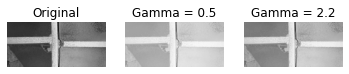

In [ ]:
image = cv2.imread(img_bad)
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image,(800,360))
gaus_img = cv2.GaussianBlur(image, (0, 0), 20)
# gaus_img = cv2.resize(gaus_img,(800,360))
output1 = gamma_correction(gray_image, gamma=3.6)
output2 = gamma_correction(gray_image, gamma=2.2)

# View
plt.subplot(1,3,1)
plt.title('Original')
plt.axis('off')
plt.imshow(gray_image, cmap='gray')
cv2.imwrite('MyDrive/hack/input/blur3.jpg', gaus_img)

plt.subplot(1,3,2)
plt.title('Gamma = 0.5')
plt.axis('off')
plt.imshow(output1, cmap='gray')

plt.subplot(1,3,3)
plt.title('Gamma = 2.2')
plt.axis('off')
plt.imshow(output2, cmap='gray')

plt.show()


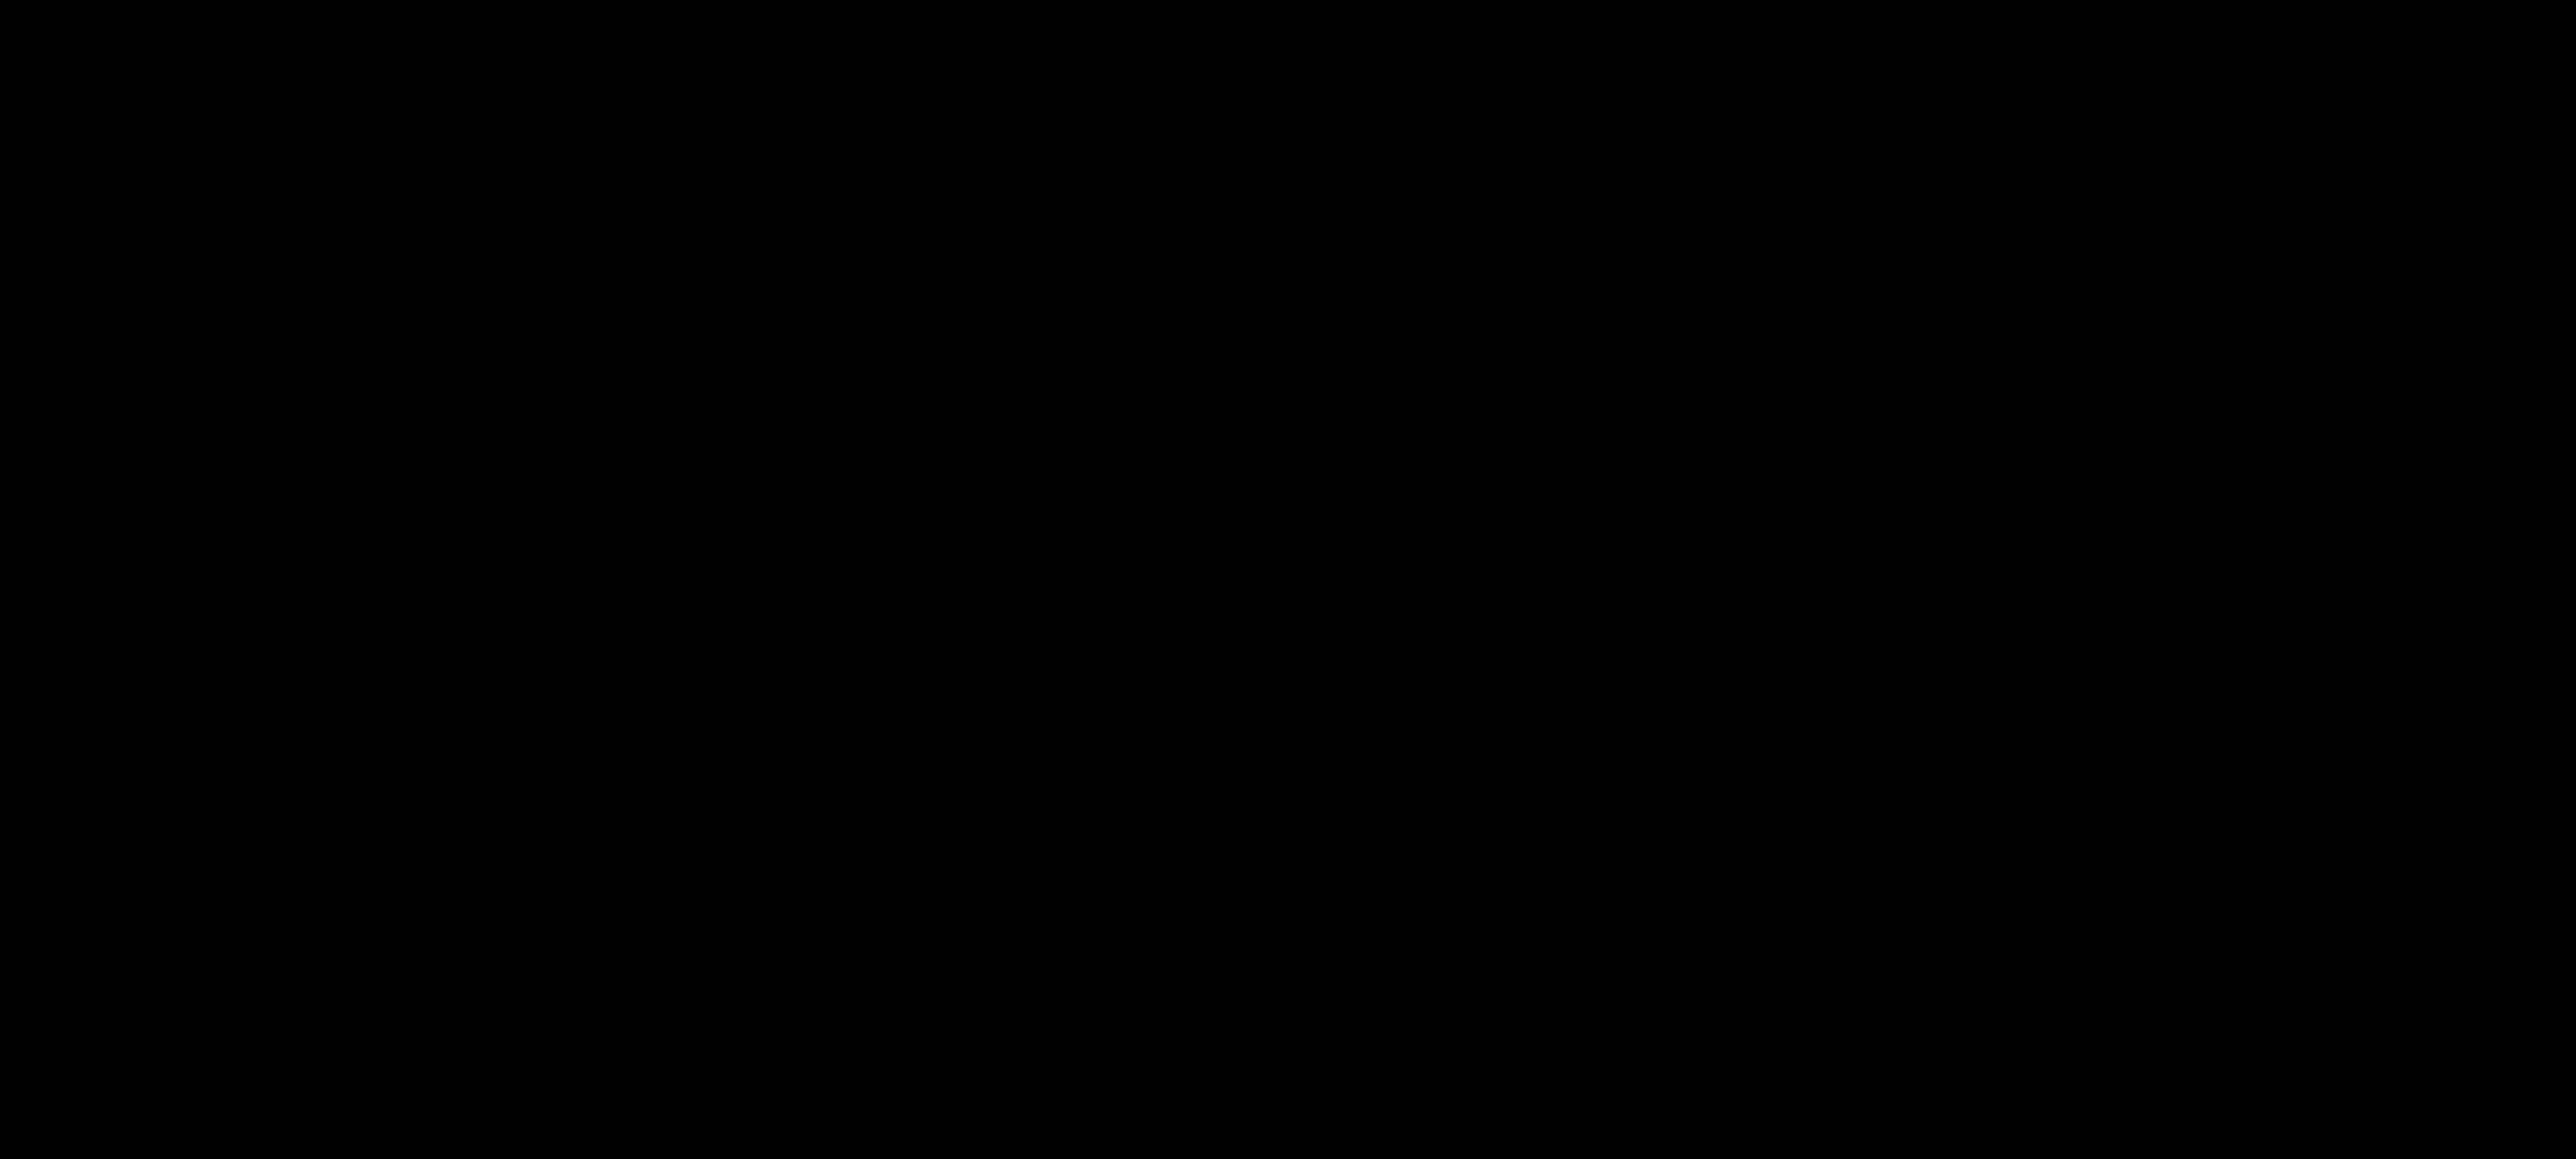

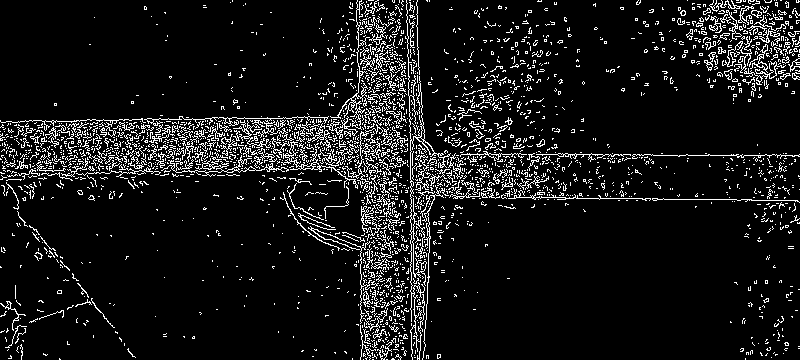

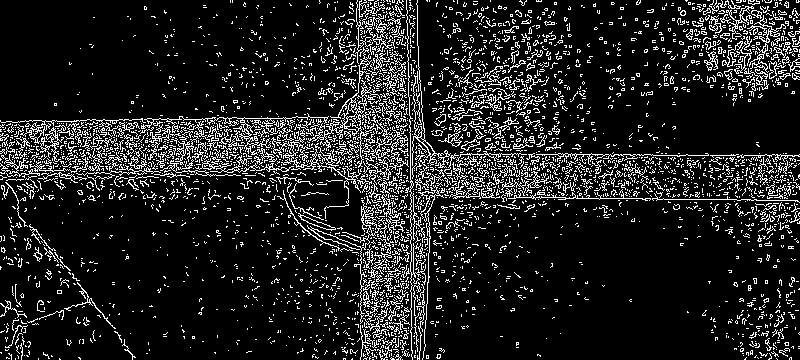

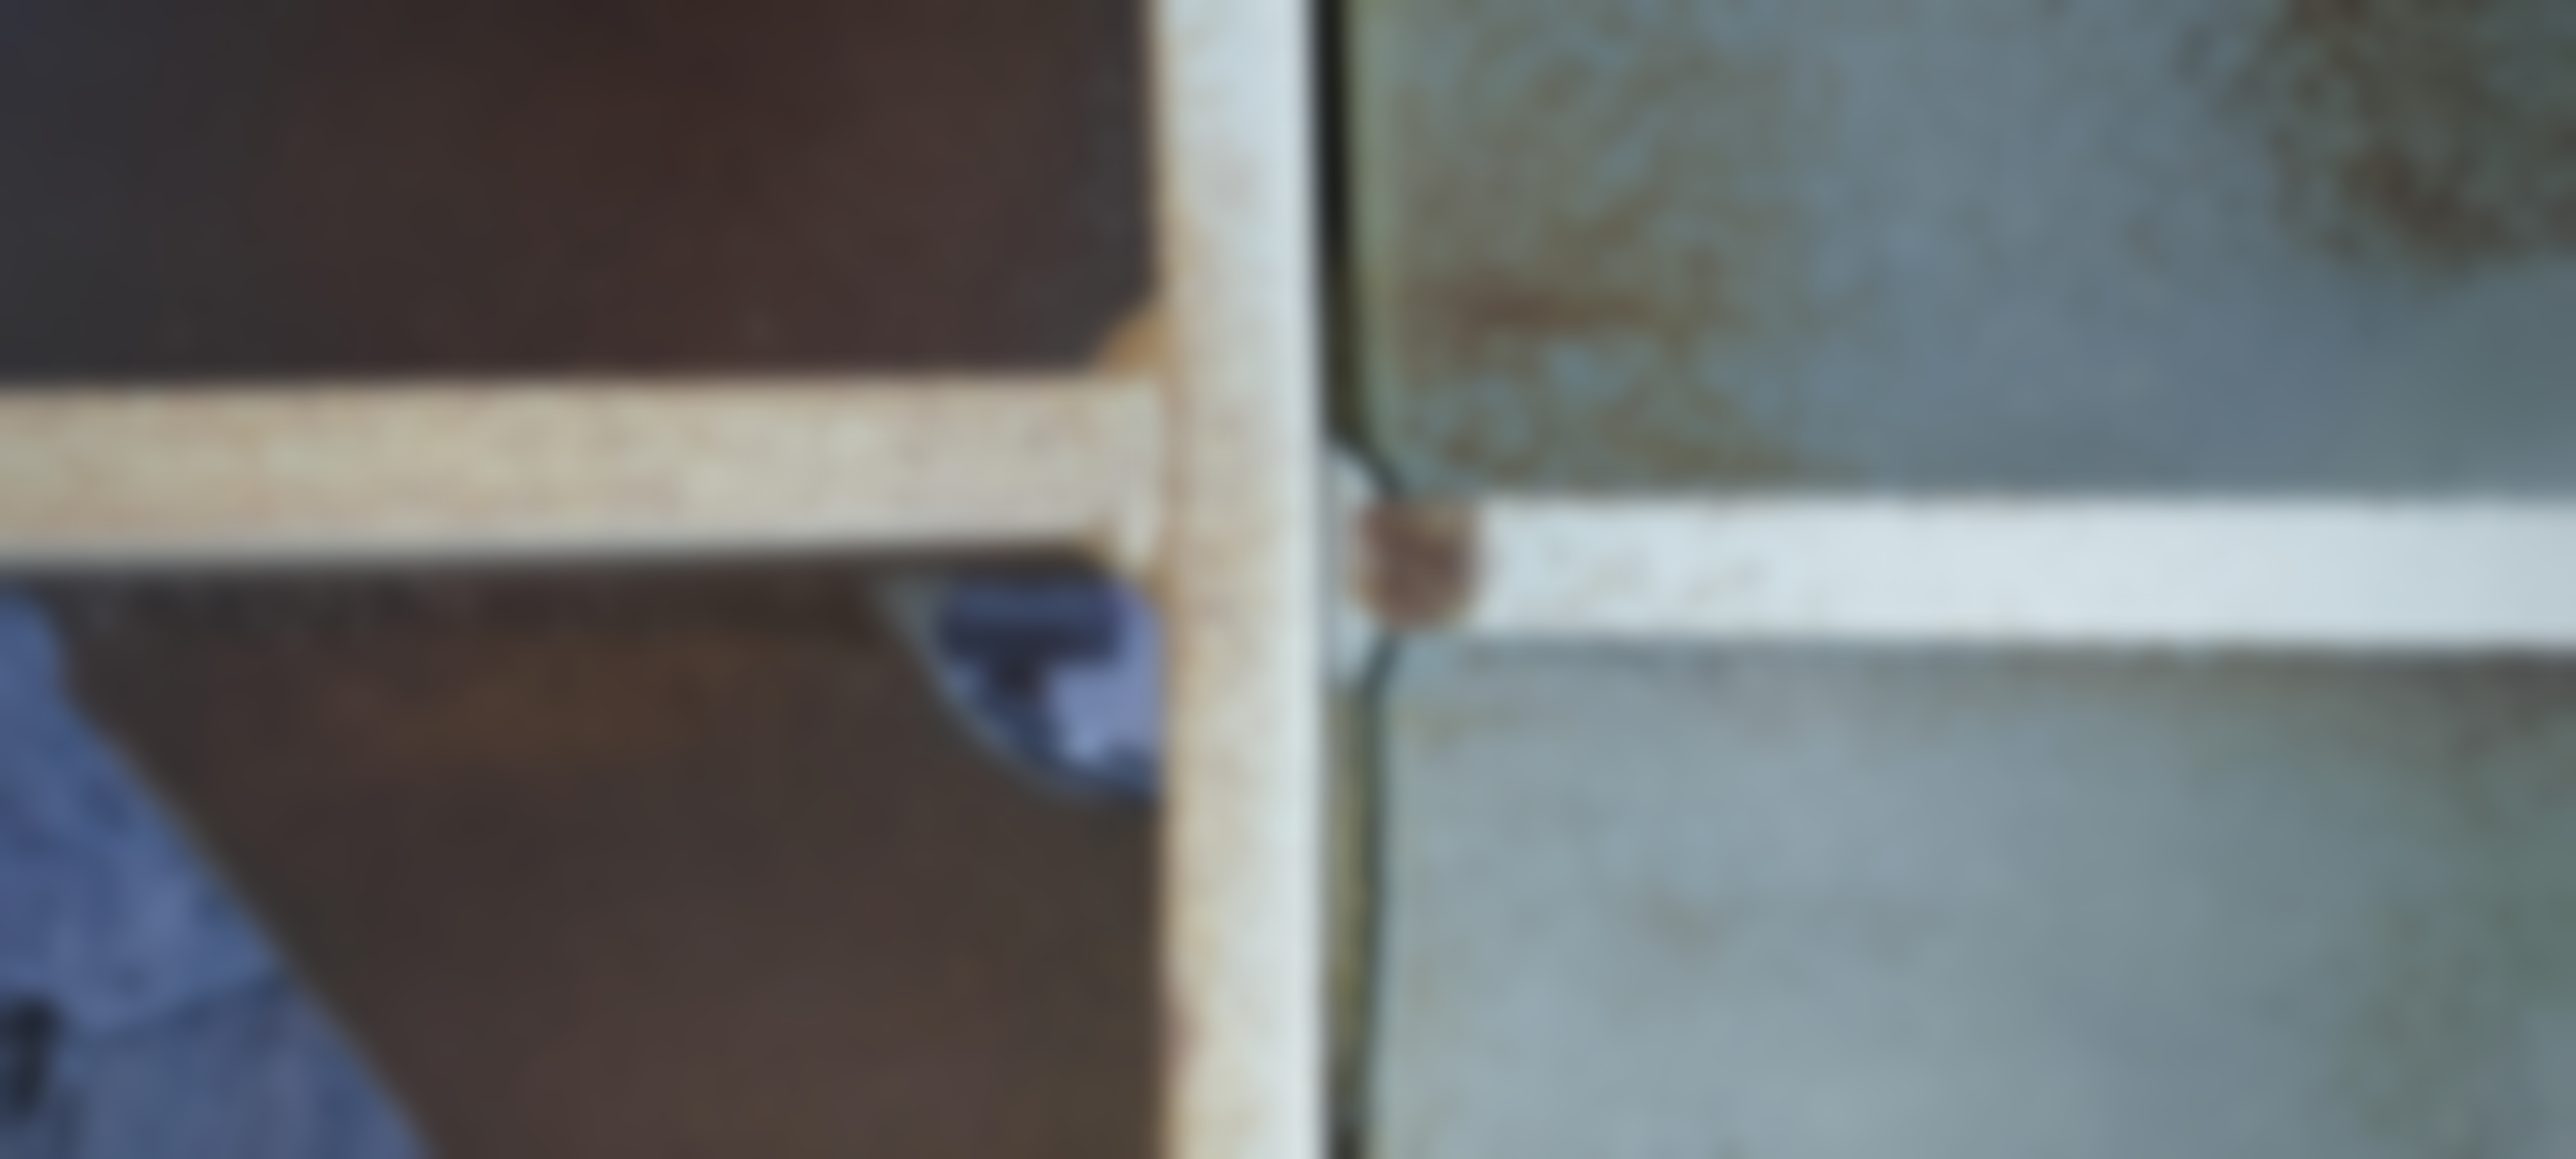

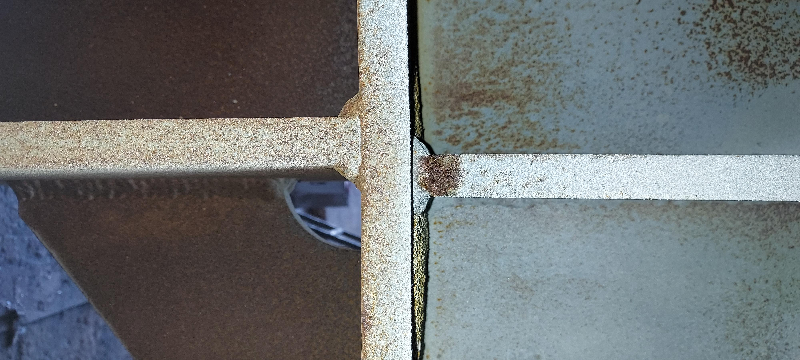

In [ ]:
low_thres = 60
high_thres = 80

edge3 = cv2.Canny(gaus_img, low_thres, high_thres)
edge1 = cv2.Canny(output1, low_thres, high_thres)
edge2 = cv2.Canny(output2, low_thres, high_thres)
cv2_imshow(edge3)
cv2_imshow(edge1)
cv2_imshow(edge2)
cv2_imshow(gaus_img)
cv2.imwrite('./MyDrive/hack/input/abc.jpg',edge1)
image = cv2.resize(image, (800,360))
cv2_imshow(image)

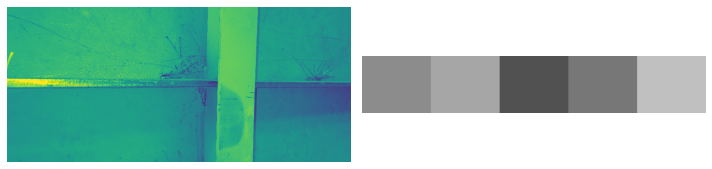

In [ ]:
from sklearn.cluster import KMeans

clt = KMeans(n_clusters=5)
clt.fit(gray_image.reshape(-1,3))

def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()


def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette
 
  
clt_1 = clt.fit(gray_image.reshape(-1, 3))
show_img_compar(gray_image, palette(clt_1))
 


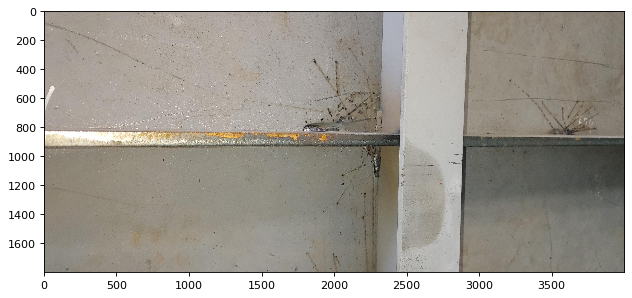

In [ ]:
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb

red_girl = imread(img_good)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(red_girl);

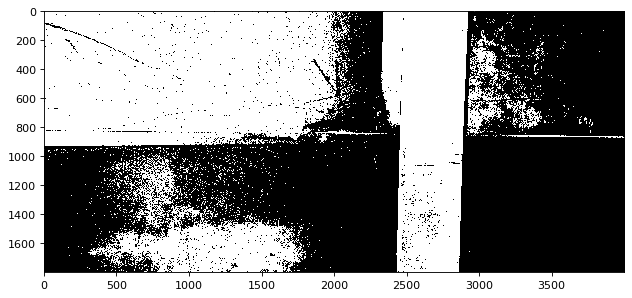

In [ ]:
red_filtered_girl = (red_girl[:,:,0] > 150)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(red_filtered_girl, cmap = 'gray');

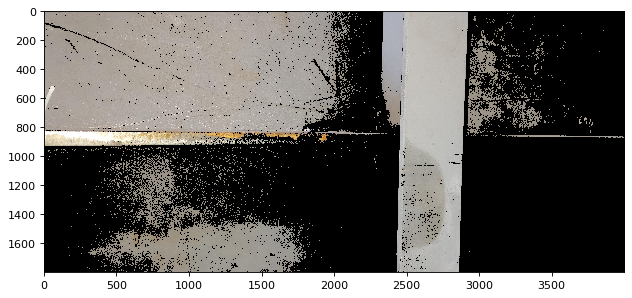

In [ ]:
red_girl_new = red_girl.copy()
red_girl_new[:, :, 0] = red_girl_new[:, :, 0]*red_filtered_girl
red_girl_new[:, :, 1] = red_girl_new[:, :, 1]*red_filtered_girl
red_girl_new[:, :, 2] = red_girl_new[:, :, 2]*red_filtered_girl
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(red_girl_new);

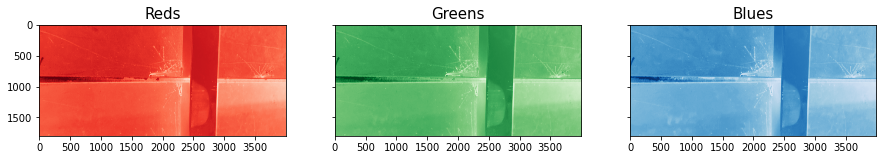

In [ ]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)
rgb_splitter(red_girl)

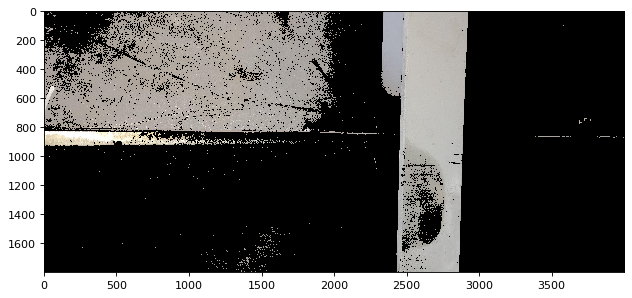

In [ ]:
red_filtered = (red_girl[:,:,0] > 150) & (red_girl[:,:,1] > 150) & (red_girl[:,:,2] > 150)
plt.figure(num=None, figsize=(8, 6), dpi=80)
red_girl_new = red_girl.copy()
red_girl_new[:, :, 0] = red_girl_new[:, :, 0] * red_filtered
red_girl_new[:, :, 1] = red_girl_new[:, :, 1] * red_filtered
red_girl_new[:, :, 2] = red_girl_new[:, :, 2] * red_filtered
imshow(red_girl_new);

In [ ]:
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

# For static images:
IMAGE_FILES = []
with mp_objectron.Objectron(static_image_mode=True,
                            max_num_objects=5,
                            min_detection_confidence=0.5,
                            model_name='Shoe') as objectron:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB and process it with MediaPipe Objectron.
    results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw box landmarks.
    if not results.detected_objects:
      print(f'No box landmarks detected on {file}')
      continue
    print(f'Box landmarks of {file}:')
    annotated_image = image.copy()
    for detected_object in results.detected_objects:
      mp_drawing.draw_landmarks(
          annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
      mp_drawing.draw_axis(annotated_image, detected_object.rotation,
                           detected_object.translation)
      cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_objectron.Objectron(static_image_mode=False,
                            max_num_objects=5,
                            min_detection_confidence=0.5,
                            min_tracking_confidence=0.99,
                            model_name='Shoe') as objectron:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = objectron.process(image)

    # Draw the box landmarks on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.detected_objects:
        for detected_object in results.detected_objects:
            mp_drawing.draw_landmarks(
              image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
            mp_drawing.draw_axis(image, detected_object.rotation,
                                 detected_object.translation)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Objectron', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()

ModuleNotFoundError: ignored

In [ ]:
from numpy.core.arrayprint import DatetimeFormat
# f = open('./MyDrive/hack/bad_canny_origin/point.txt', 'w')
count = 7
# f.write('ABC')
string_list = []

for i in range(20):
  src = cv2.imread(img_bad)
  dst = src.copy()
  gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  canny = cv2.Canny(gray, 5000, 1500, apertureSize = 5, L2gradient = True)
  lines = cv2.HoughLines(canny, 0.8, np.pi / 180, 240 + (i+7), srn = 100, stn = 200, min_theta = 0, max_theta = np.pi)
  
  # f.write('Image' + str(count) + '\n')
  # f = open('./MyDrive/hack/good_canny_origin/point.txt', 'a')
  # f.write('Image' + str(count) + '\n')
  # f.close()
  for i in lines:
      rho, theta = i[0][0], i[0][1]
      a, b = np.cos(theta), np.sin(theta)
      x0, y0 = a*rho, b*rho

      scale = src.shape[0] + src.shape[1]

      x1 = int(x0 + scale * -b)
      y1 = int(y0 + scale * a)
      x2 = int(x0 - scale * -b)
      y2 = int(y0 - scale * a)
      data = '(' + str(x1) + ',' + str(y1) + '), (' + str(x2) + ',' + str(y2) + ')\n'
      # f = open('./MyDrive/hack/bad_canny_origin/point.txt', 'a')
      # f.write(data)
      # f.close()
      cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 2)
      # cv2.circle(dst, (x0, y0), 3, (255, 0, 0), 5, cv2.FILLED)
      # count += 1
      # if(count > 5):
      #   break

  cv2_imshow(dst)
  cv2.imwrite('./MyDrive/hack/hough/bad_hough' + str(count) + '.jpg', dst)
  count += 1



Semantic Segmentation

In [ ]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to /root/.cache/torch/hub/checkpoints/fcn_resnet101_coco-7ecb50ca.pth


  0%|          | 0.00/208M [00:00<?, ?B/s]

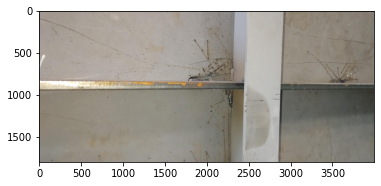

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch


img = Image.open(img_good)
plt.imshow(img); plt.show()

In [ ]:
# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [ ]:
# Pass the input through the net
out = fcn(inp)['out']
print (out.shape)

torch.Size([1, 21, 224, 224])


In [ ]:
# import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)
print (np.unique(om))

(224, 224)
[0]


In [ ]:
# Define the helper function
def decode_segmap(image, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

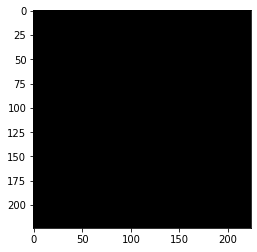

In [ ]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [ ]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
def segment(net, path, show_orig=True, dev='cuda'):
  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(dev)
  out = net.to(dev)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

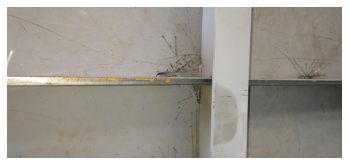

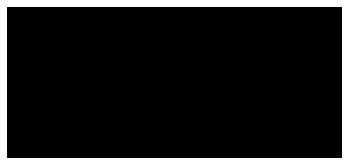

In [ ]:
segment(dlab, img_good)

In [ ]:
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [ ]:
class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph'

  def __init__(self, tarball_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    # Extract frozen graph from tar archive.
    tar_file = tarfile.open(tarball_path)
    for tar_info in tar_file.getmembers():
      if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
        file_handle = tar_file.extractfile(tar_info)
        graph_def = tf.GraphDef.FromString(file_handle.read())
        break

    tar_file.close()

    if graph_def is None:
      raise RuntimeError('Cannot find inference graph in tar archive.')

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')

    self.sess = tf.Session(graph=self.graph)

  def run(self, image):
    """Runs inference on a single image.

    Args:
      image: A PIL.Image object, raw input image.

    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    width, height = image.size
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    return resized_image, seg_map


def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.

  Returns:
    A Colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  return colormap


def label_to_color_image(label):
  """Adds color defined by the dataset colormap to the label.

  Args:
    label: A 2D array with integer type, storing the segmentation label.

  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the PASCAL color map.

  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label')

  colormap = create_pascal_label_colormap()

  if np.max(label) >= len(colormap):
    raise ValueError('label value too large.')

  return colormap[label]


def vis_segmentation(image, seg_map):
  """Visualizes input image, segmentation map and overlay view."""
  plt.figure(figsize=(15, 5))
  grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

  plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  plt.title('input image')

  plt.subplot(grid_spec[1])
  seg_image = label_to_color_image(seg_map).astype(np.uint8)
  plt.imshow(seg_image)
  plt.axis('off')
  plt.title('segmentation map')

  plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(seg_image, alpha=0.7)
  plt.axis('off')
  plt.title('segmentation overlay')

  unique_labels = np.unique(seg_map)
  ax = plt.subplot(grid_spec[3])
  plt.imshow(
      FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
  ax.yaxis.tick_right()
  plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
  plt.xticks([], [])
  ax.tick_params(width=0.0)
  plt.grid('off')
  plt.show()


LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

In [ ]:
MODEL_NAME = 'mobilenetv2_coco_voctrainaug'  # @param ['mobilenetv2_coco_voctrainaug', 'mobilenetv2_coco_voctrainval', 'xception_coco_voctrainaug', 'xception_coco_voctrainval']

_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'
_MODEL_URLS = {
    'mobilenetv2_coco_voctrainaug':
        'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
    'mobilenetv2_coco_voctrainval':
        'deeplabv3_mnv2_pascal_trainval_2018_01_29.tar.gz',
    'xception_coco_voctrainaug':
        'deeplabv3_pascal_train_aug_2018_01_04.tar.gz',
    'xception_coco_voctrainval':
        'deeplabv3_pascal_trainval_2018_01_04.tar.gz',
}
_TARBALL_NAME = 'deeplab_model.tar.gz'

model_dir = tempfile.mkdtemp()
tf.gfile.MakeDirs(model_dir)

download_path = os.path.join(model_dir, _TARBALL_NAME)
print('downloading model, this might take a while...')
urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + _MODEL_URLS[MODEL_NAME],
                   download_path)
print('download completed! loading DeepLab model...')

MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

downloading model, this might take a while...
download completed! loading DeepLab model...
model loaded successfully!


running deeplab on image https://github.com/YunSeob/Signal-image/blob/main/good23.jpg?raw=true...


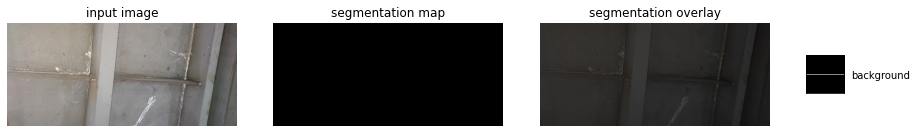

In [ ]:

SAMPLE_IMAGE = 'good23'  # @param ['image1', 'image2', 'image3']
IMAGE_URL = ''  #@param {type:"string"}

# _SAMPLE_URL = ('https://github.com/tensorflow/models/blob/master/research/'
#                'deeplab/g3doc/img/%s.jpg?raw=true')

_SAMPLE_URL = ('https://github.com/YunSeob/Signal-image/blob/main/'
               '%s.jpg?raw=true')

def run_visualization(url):
  """Inferences DeepLab model and visualizes result."""
  try:
    f = urllib.request.urlopen(url)
    jpeg_str = f.read()
    original_im = Image.open(BytesIO(jpeg_str))
  except IOError:
    print('Cannot retrieve image. Please check url: ' + url)
    return

  print('running deeplab on image %s...' % url)
  resized_im, seg_map = MODEL.run(original_im)

  vis_segmentation(resized_im, seg_map)


image_url = IMAGE_URL or _SAMPLE_URL % SAMPLE_IMAGE
run_visualization(image_url)